In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
import os
from yellowbrick.cluster import KElbowVisualizer
warnings.filterwarnings("ignore")

## Пункт 1. Добавление нового атрибута
В моем случае добавлю новый столбец под названием "Evolution", который будет обозначать ступень эволюции каждого покемона. Этот атрибут зависит от суммарной мощи покемона - "Total".

In [2]:
df = pd.read_csv("F:\Учеба\ML\pokemon.csv")
df['Evolution'] = None
df.head()

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,Evolution
0,Bulbasaur,318,45,49,49,65,65,45,None
1,Ivysaur,405,60,62,63,80,80,60,None
2,Venusaur,525,80,82,83,100,100,80,None
3,Mega Venusaur,625,80,100,123,122,120,80,None
4,Charmander,309,39,52,43,60,50,65,None


Заполним столбец "Evolution"

In [3]:
df.loc[df['Total'] > 150, 'Evolution'] = 1
df.loc[df['Total'] > 400, 'Evolution'] = 2
df.loc[df['Total'] > 650, 'Evolution'] = 3
df

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,Evolution
0,Bulbasaur,318,45,49,49,65,65,45,1
1,Ivysaur,405,60,62,63,80,80,60,2
2,Venusaur,525,80,82,83,100,100,80,2
3,Mega Venusaur,625,80,100,123,122,120,80,2
4,Charmander,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
1040,Glastrier,580,100,145,130,65,110,30,2
1041,Spectrier,580,100,65,60,145,80,130,2
1042,Calyrex,500,100,80,80,80,80,80,2
1043,Mega Calyrex,680,100,165,150,85,130,50,3


## Пункт 2. Причесываем датасет


In [4]:
del df['Name']
df.head()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,Evolution
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,2
2,525,80,82,83,100,100,80,2
3,625,80,100,123,122,120,80,2
4,309,39,52,43,60,50,65,1


In [5]:
# Удаляем выбросы
for column in df.columns:
    lower_bound = df[column].mean() - 3 * df[column].std()
    upper_bound = df[column].mean() + 3 * df[column].std()
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Удаляем дубли
df = df.drop(df[df.duplicated()].index)
df

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,Evolution
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,2
2,525,80,82,83,100,100,80,2
3,625,80,100,123,122,120,80,2
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
1040,580,100,145,130,65,110,30,2
1041,580,100,65,60,145,80,130,2
1042,500,100,80,80,80,80,80,2
1043,680,100,165,150,85,130,50,3


In [6]:
# Проверяем на наличие пропущенных значений
for column in df.columns:
    missing = df[column].isna().sum()
    print(f"Пропущенных значений в {column} : {missing}")

Пропущенных значений в Total : 0
Пропущенных значений в HP : 0
Пропущенных значений в Attack : 0
Пропущенных значений в Defence : 0
Пропущенных значений в Sp_attack : 0
Пропущенных значений в Sp_defence : 0
Пропущенных значений в Speed : 0
Пропущенных значений в Evolution : 0


In [7]:
# Кривые данные
df['Evolution'] = pd.to_numeric(df['Evolution'], errors='coerce', downcast='integer')
# Z оценка
z_scores = stats.zscore(df.iloc[:, :])
df = df[(z_scores < 3) & (z_scores > -3)]
df


,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,Evolution
0,318,45.0,49,49.0,65.0,65.0,45,1
1,405,60.0,62,63.0,80.0,80.0,60,2
2,525,80.0,82,83.0,100.0,100.0,80,2
3,625,80.0,100,123.0,122.0,120.0,80,2
4,309,39.0,52,43.0,60.0,50.0,65,1
...,...,...,...,...,...,...,...,...
1040,580,100.0,145,130.0,65.0,110.0,30,2
1041,580,100.0,65,60.0,145.0,80.0,130,2
1042,500,100.0,80,80.0,80.0,80.0,80,2
1043,680,100.0,165,150.0,85.0,130.0,50,3


## Пункт 3

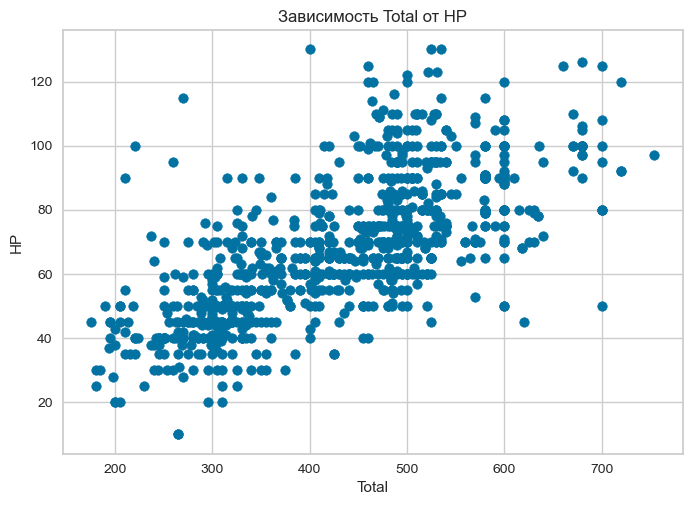

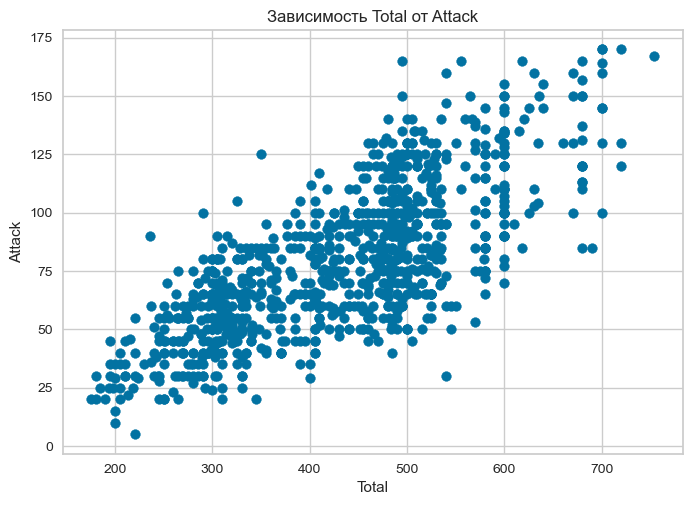

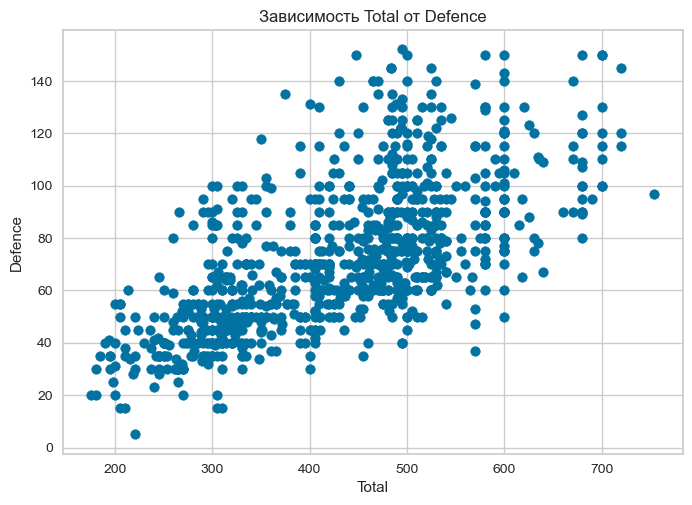

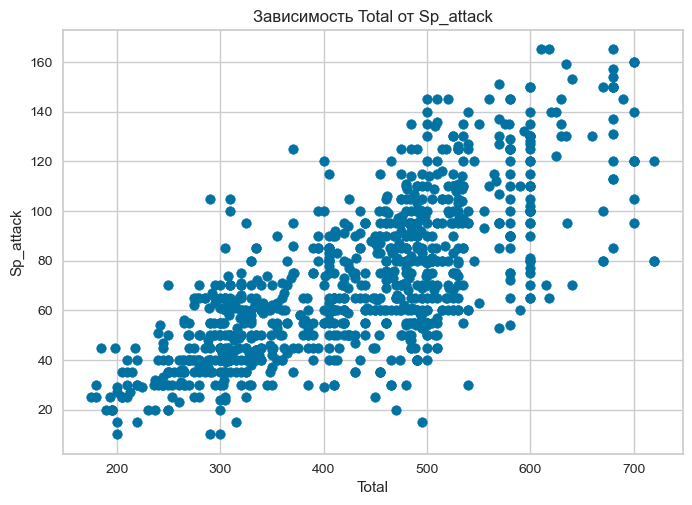

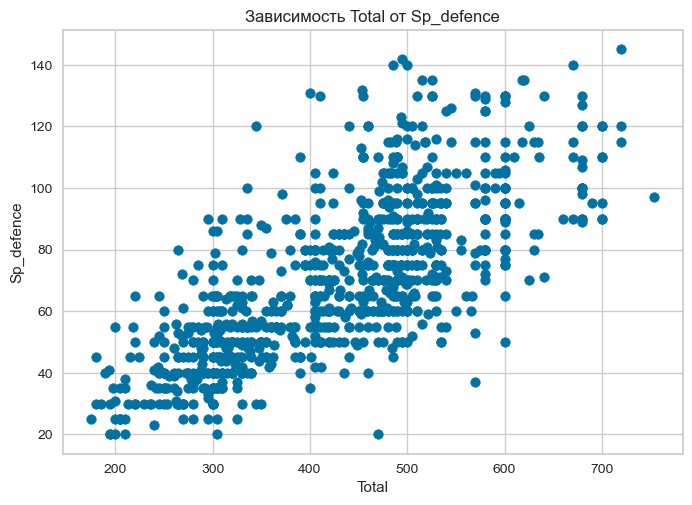

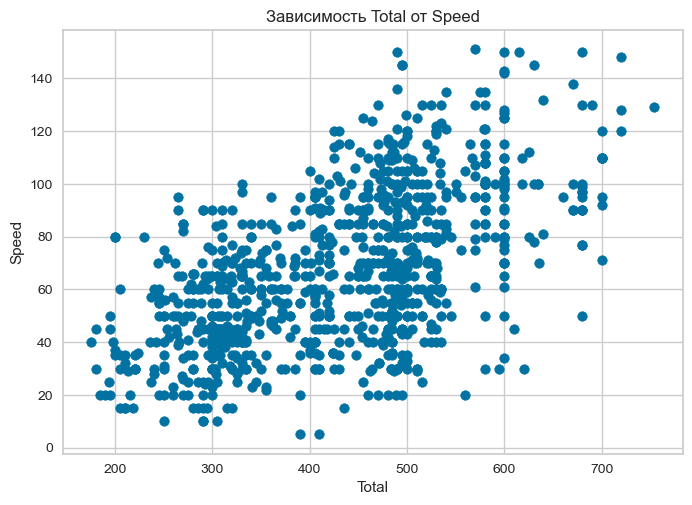

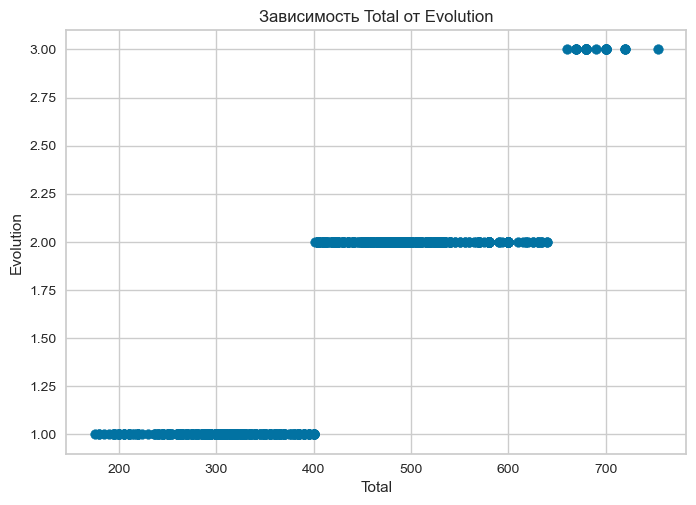

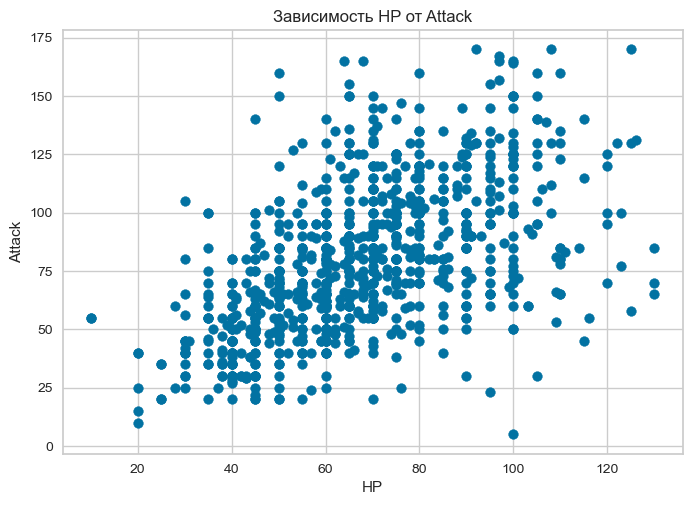

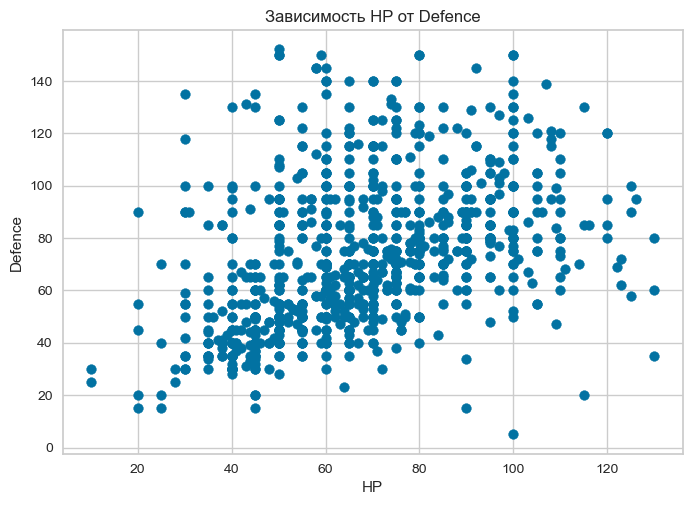

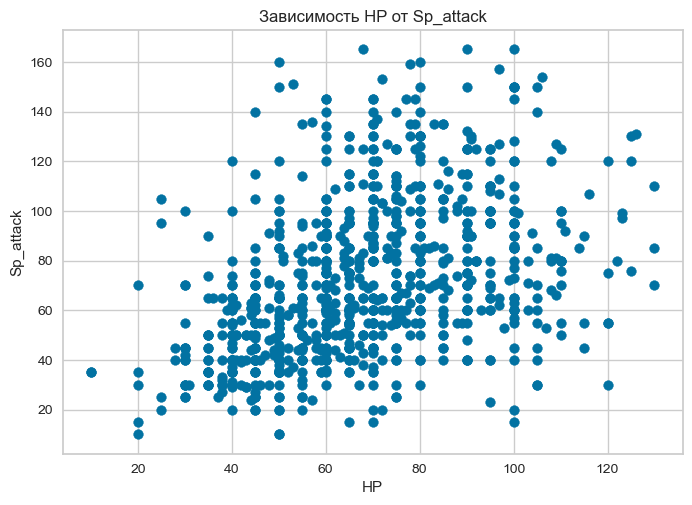

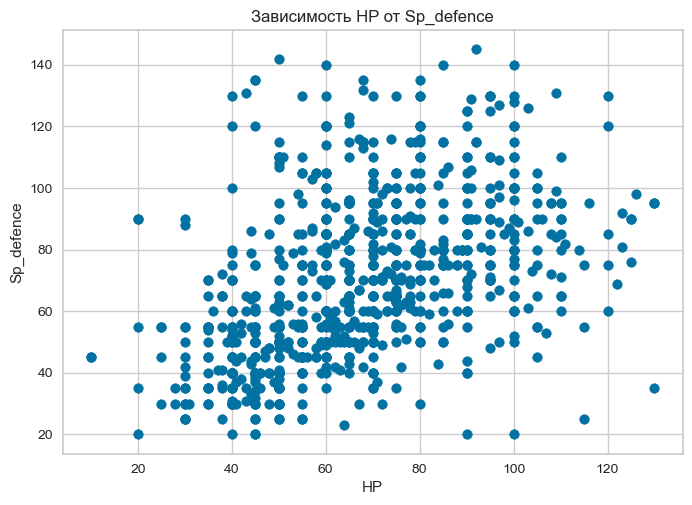

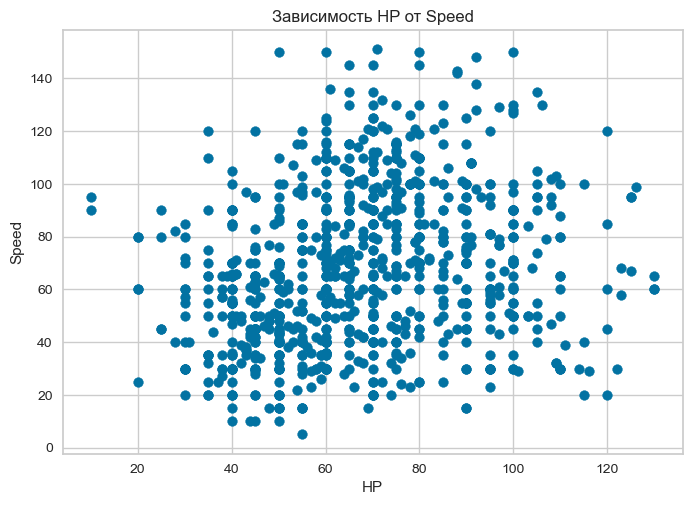

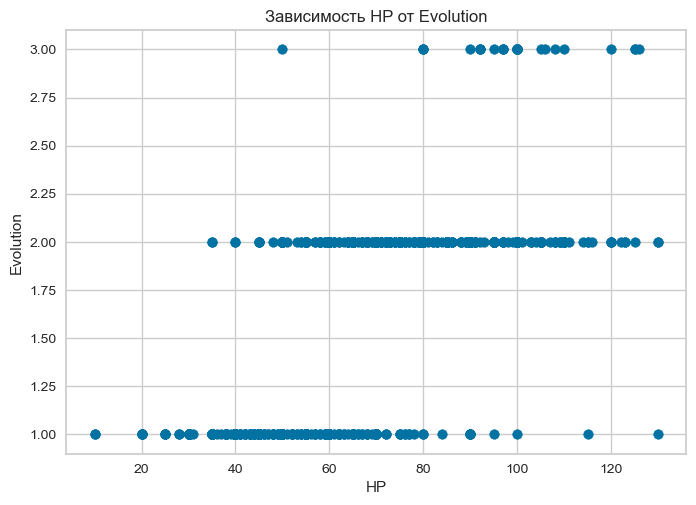

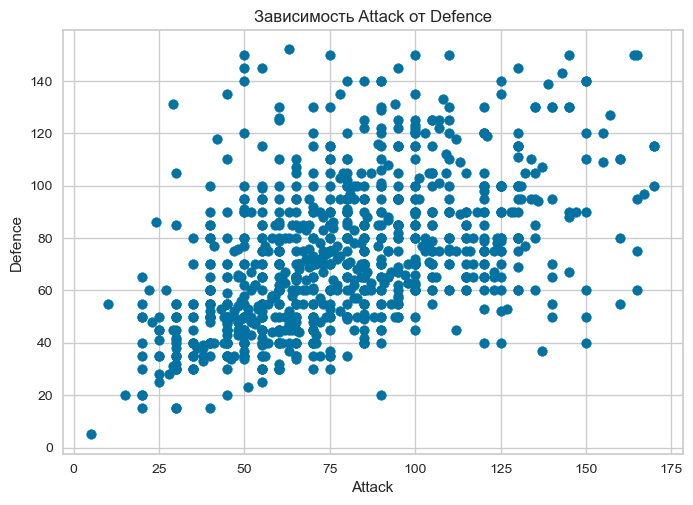

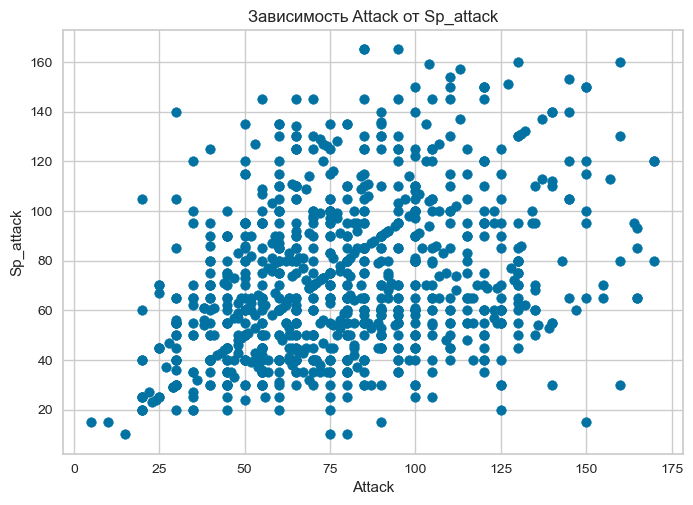

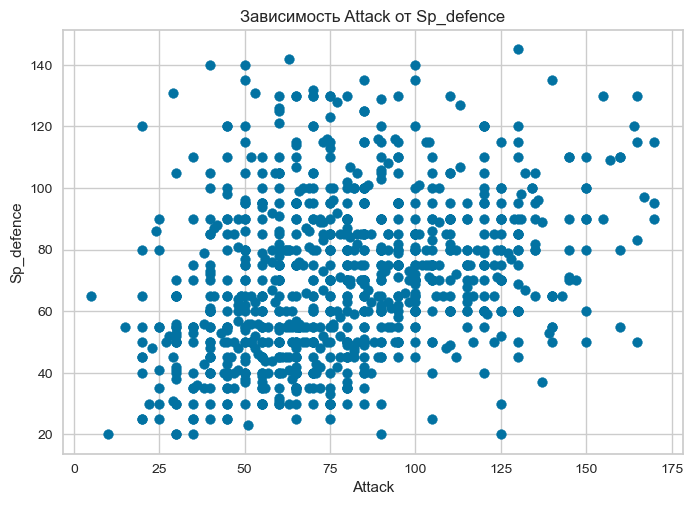

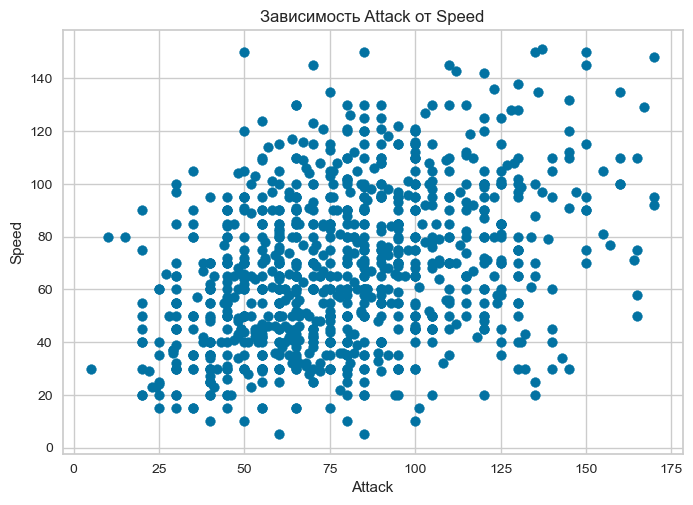

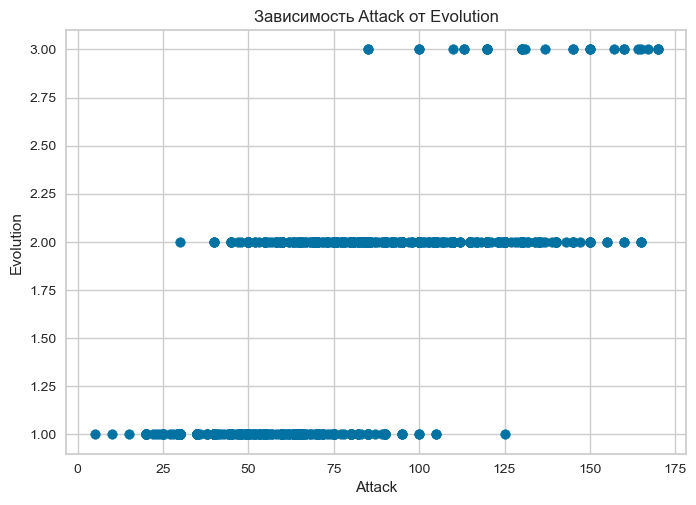

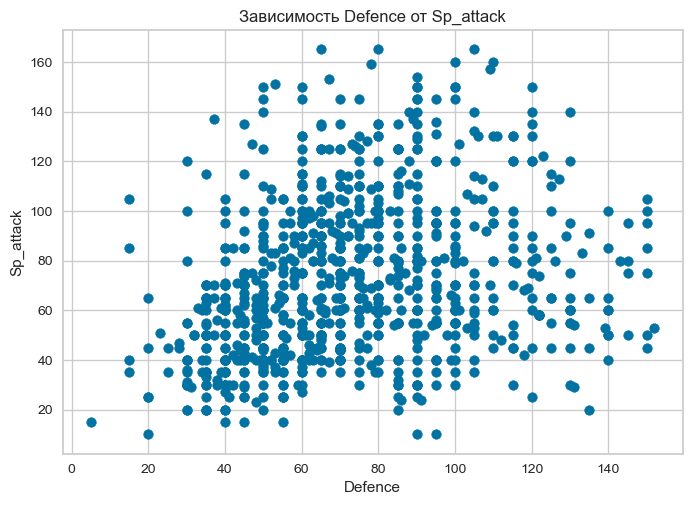

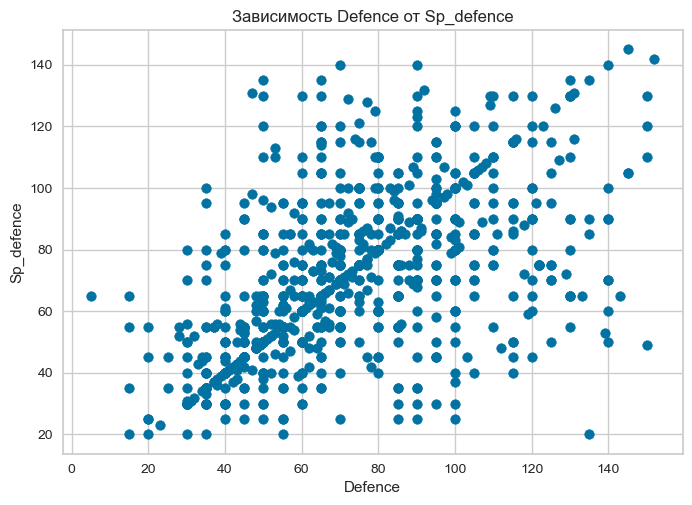

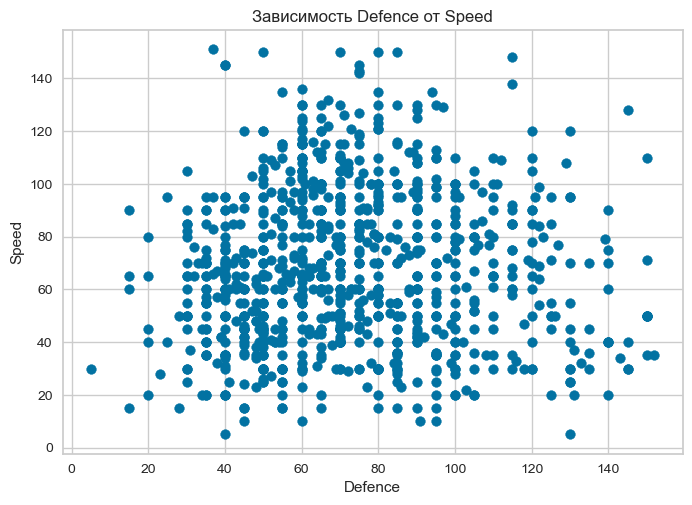

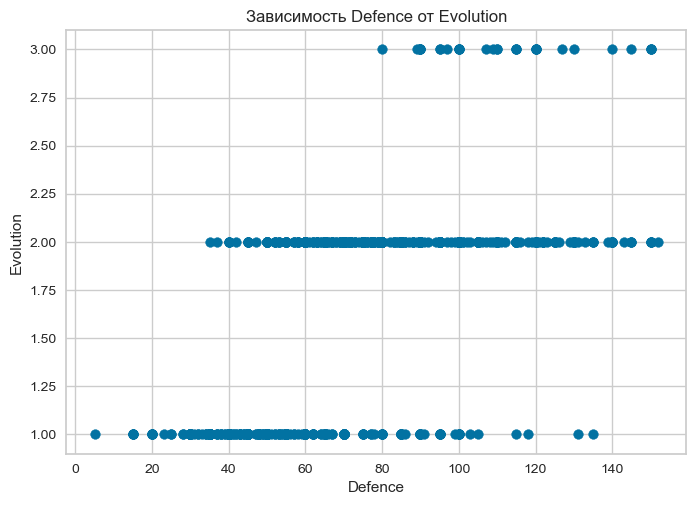

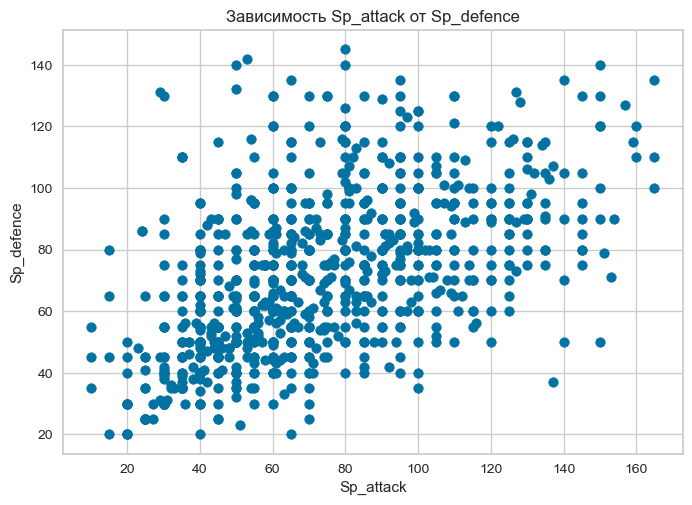

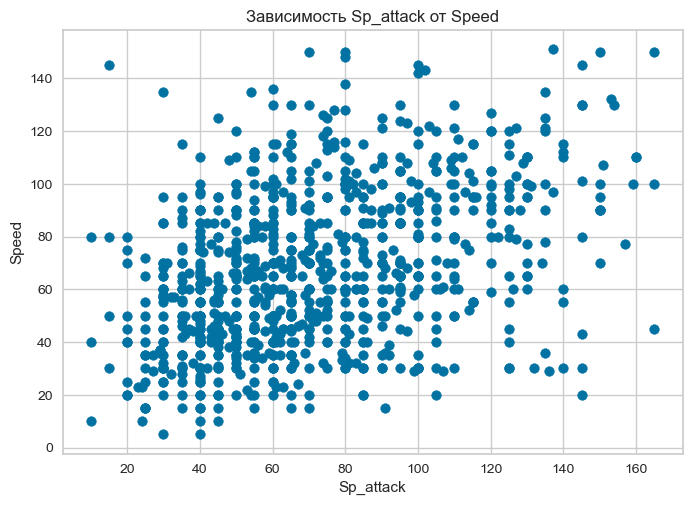

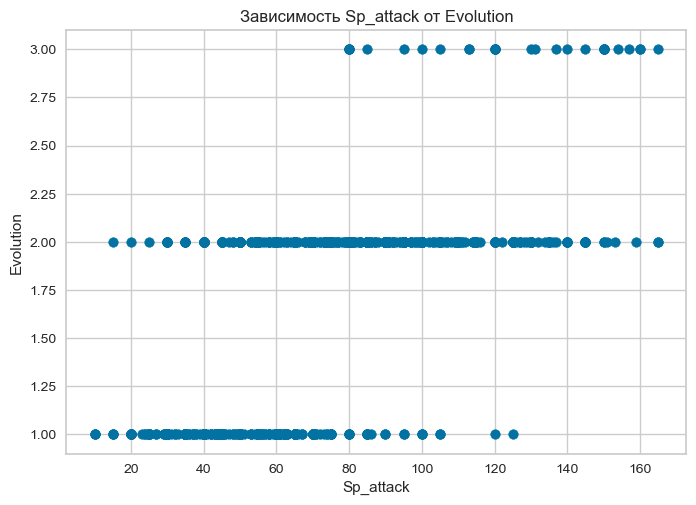

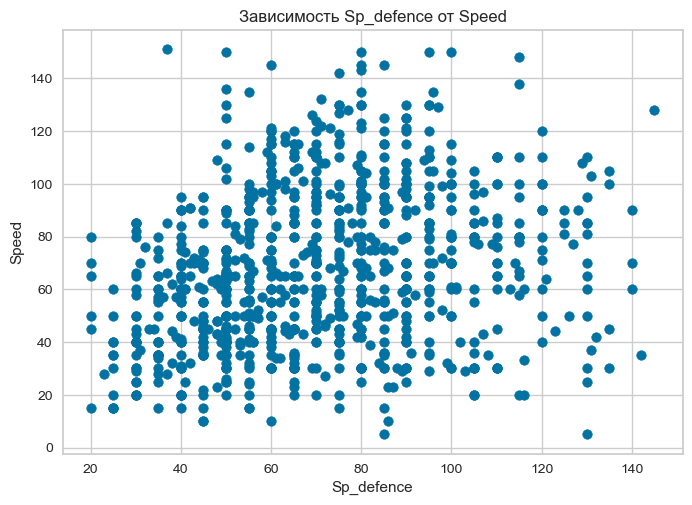

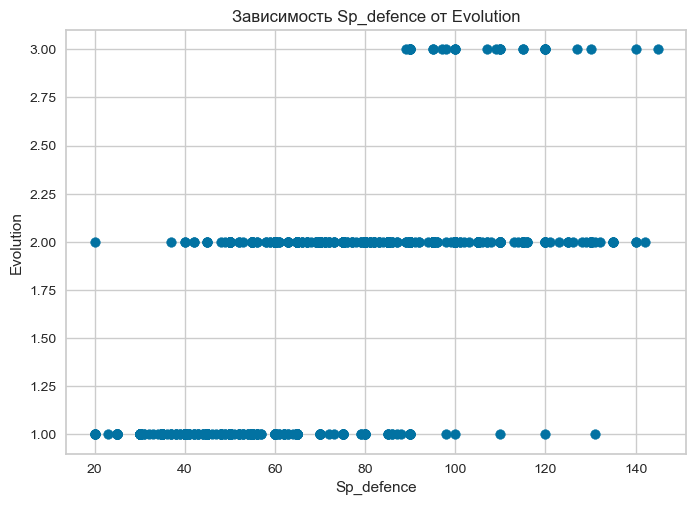

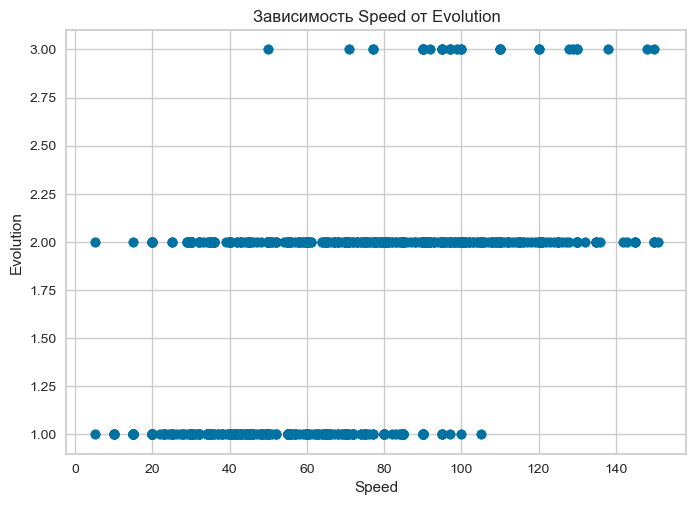

In [8]:
columns = df.columns
column_pairs = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column_pairs.append((columns[i], columns[j]))

for column1, column2 in column_pairs:
    plt.scatter(df[column1], df[column2])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'Зависимость {column1} от {column2}')
    plt.show()

### Анализ
На графиках Sp_attack - Attack, Sp_defence - Defence, Sp_defence - Sp_attack кластеры видны вдоль диагонали, это может указывать на то, что группы обладают схожими характеристиками. Соответственно имеем 3 выраженных кластера. Отдельно по каждой группе:
1. Sp_attack - Attack. Первый кластер говорит нам о том, что при высоких показателях стандартной атаки покемона растет и показатель спец. атаки.
2. Sp_defence - Defence. Второй кластер аналогичен первому, но в этом случае речь идет о стандартной защите и защите от спец. атак.
3. Sp_defence - Sp_attack. Третий кластер показывает, что, вероятно, чем лучше покемон осваивает спец. атаку, тем легче ему защищаться от спец. атак других покемонов.

## Пункт 4

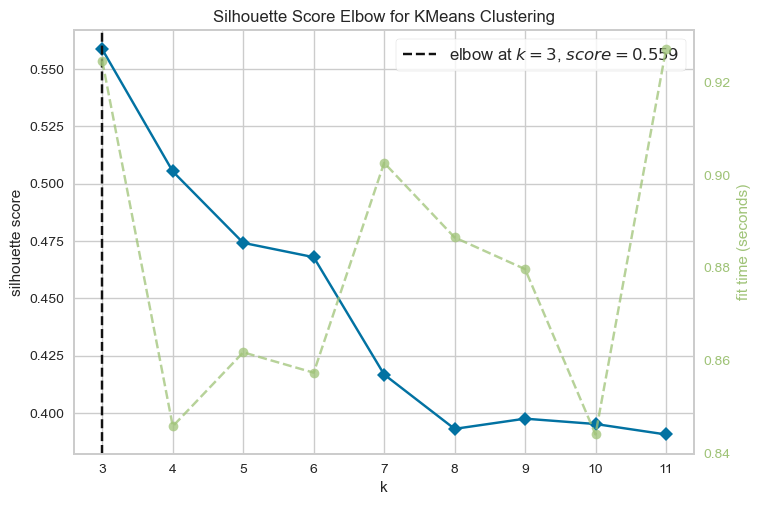

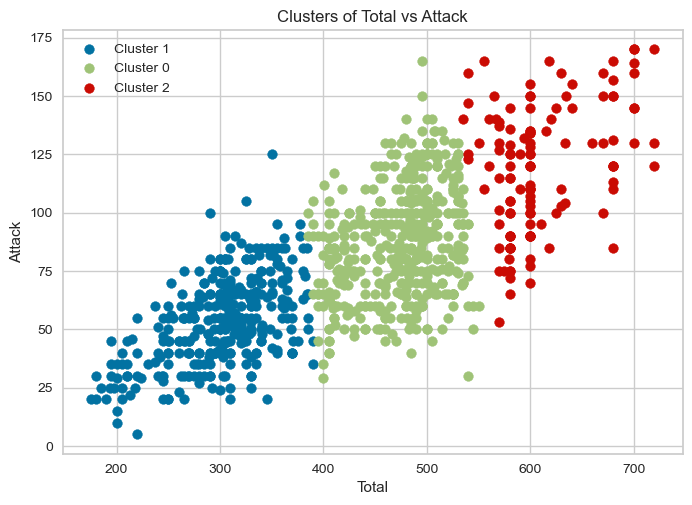

In [9]:
df.dropna(inplace=True)
os.environ['OMP_NUM_THREADS'] = '1'

selected_features = ['Total', 'Attack']

selected_data = df[selected_features]


model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model , k=(3,12), metric='silhouette')
visualizer.fit(selected_data); visualizer.show()

# Алгоритм k-средних
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(selected_data)

# Визуализация результатов
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data[selected_features[0]], cluster_data[selected_features[1]], label=f'Cluster {cluster}')

plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend()
plt.title(f'Clusters of {selected_features[0]} vs {selected_features[1]}')
plt.show()

## Вывод
Добавление нового атрибута:
В ходе работы с датасетом был успешно добавлен новый атрибут, представляющий собой ступень эволюции покемона.

"Причесывание" датасета:
Этот процесс позволил обеспечить более точные и достоверные результаты анализа, улучшая качество данных и предотвращая искажения.

Построение графиков зависимости:
Были построены графики зависимости одной переменной от другой. В ходе анализа выявлены различные кластеры, отражающие взаимосвязи между переменными.

Применение метода KMeans:
Следуя примеру из указанных ноутбуков, был успешно применен метод KMeans к датасету. Этот метод кластеризации помог выделить группы объектов с схожими характеристиками, что может быть полезным для дальнейшего анализа и классификации данных.

## 